# Forest Cover Type

The goal of this project is to predict the correct forest cover type (defined as an integer between 1 and 7), out of 7 possibilities:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The predictions are evaluated using multi-class classification accuracy.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. 

The features are:
- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

The 40 soil types can be found in the data section. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
local_path = "./data/"
kaggle_path = "../input/"

train = pd.read_csv(local_path+"train.csv")
# Holdout for 'test' to avoid confusing when splitting training data into train/test
holdout = pd.read_csv(local_path+"test.csv") 

train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [4]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


A first look at the data shows that there are no missing values, and that all our columns are numerical (integer).  We have a total of 15,120 observations in our train dataframe, and 56 columns, out of which 40 are dedicated to soil types. The categorical explanatory variables are all already dummy coded. 



## EDA
Let's take a closer look at the different features we have available.
We'll start with the target variable (Cover_Type): 
- equally distributed in the data set?
- order? 
- Is there any transformation that needs to happen?

Then the features:
- Can we already spot relationships between specific features and the target?


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train["Cover_Type"].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

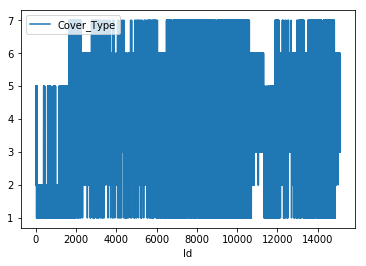

In [7]:
train.plot("Id", "Cover_Type")

### Explanatory Variables

In [9]:
# Splitting train into different sub dataframe with similar features
train_elassl = pd.concat([train.iloc[:,0:3],train.iloc[:, -1]], axis=1)
train_distance = pd.concat([train.iloc[:,3:6],train.iloc[:,9],train.iloc[:, -1]], axis=1)
train_hillshade = pd.concat([train.iloc[:,6:9],train.iloc[:, -1]], axis=1)
train_wilderness = pd.concat([train.iloc[:,10:14],train.iloc[:, -1]], axis=1)

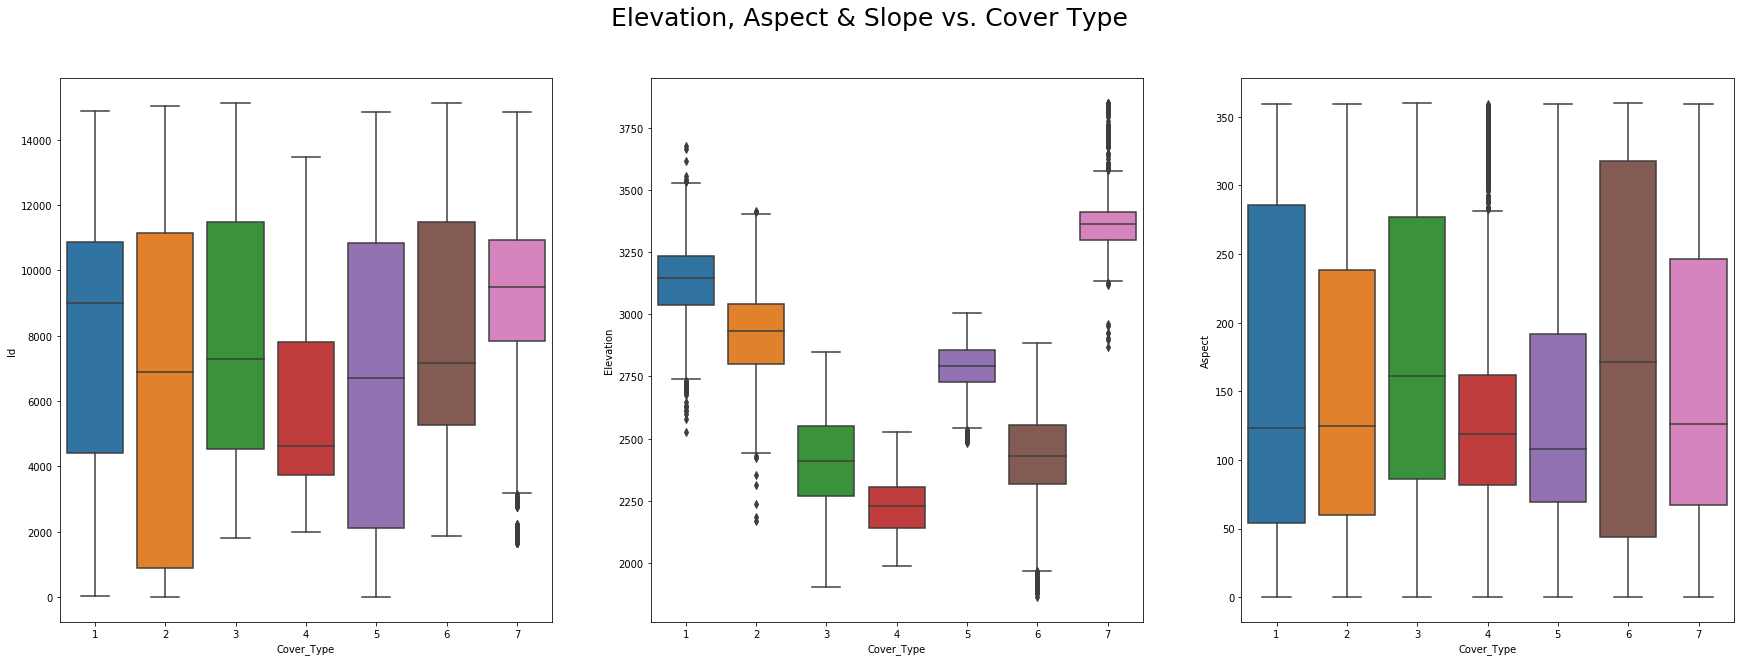

In [10]:
fig = plt.figure(figsize=(30,10))
for i, col in enumerate(train_elassl.columns[:-1]):  
    ax = fig.add_subplot(int("13"+str(i+1)))
    sns.boxplot(x='Cover_Type', y=col, data=train)
fig.suptitle('Elevation, Aspect & Slope vs. Cover Type', fontsize =25)
plt.show()

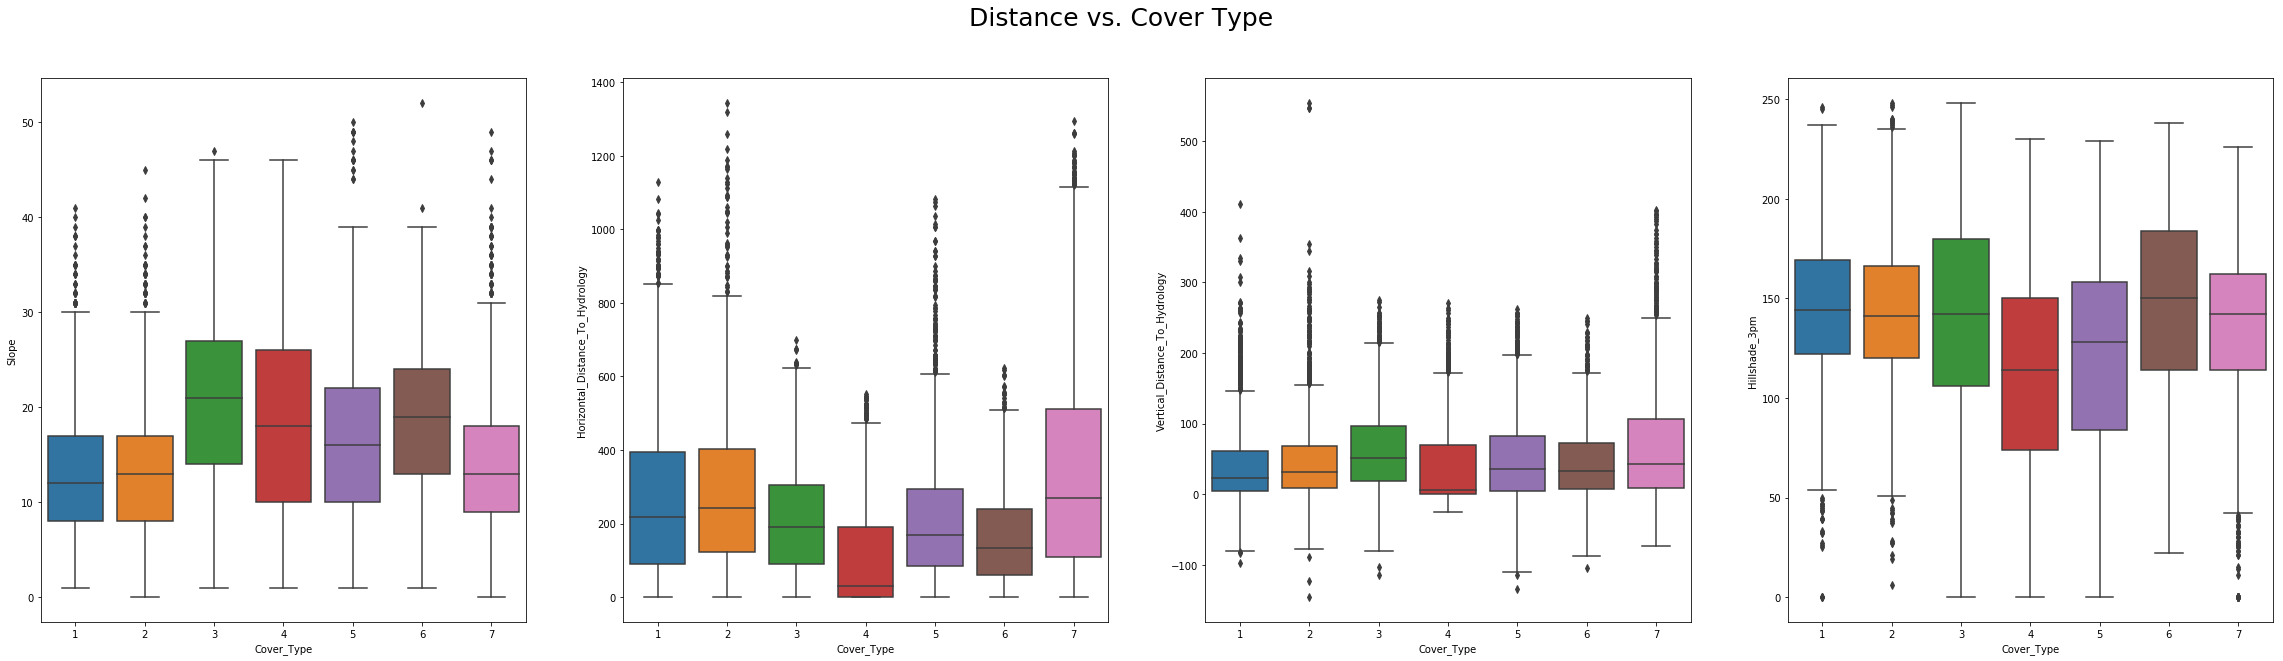

In [11]:
fig = plt.figure(figsize=(40,10))
for i, col in enumerate(train_distance.columns[:-1]):  
    ax = fig.add_subplot(int("14"+str(i+1)))
    sns.boxplot(x='Cover_Type', y=col, data=train)
fig.suptitle('Distance vs. Cover Type', fontsize =25)

plt.show()

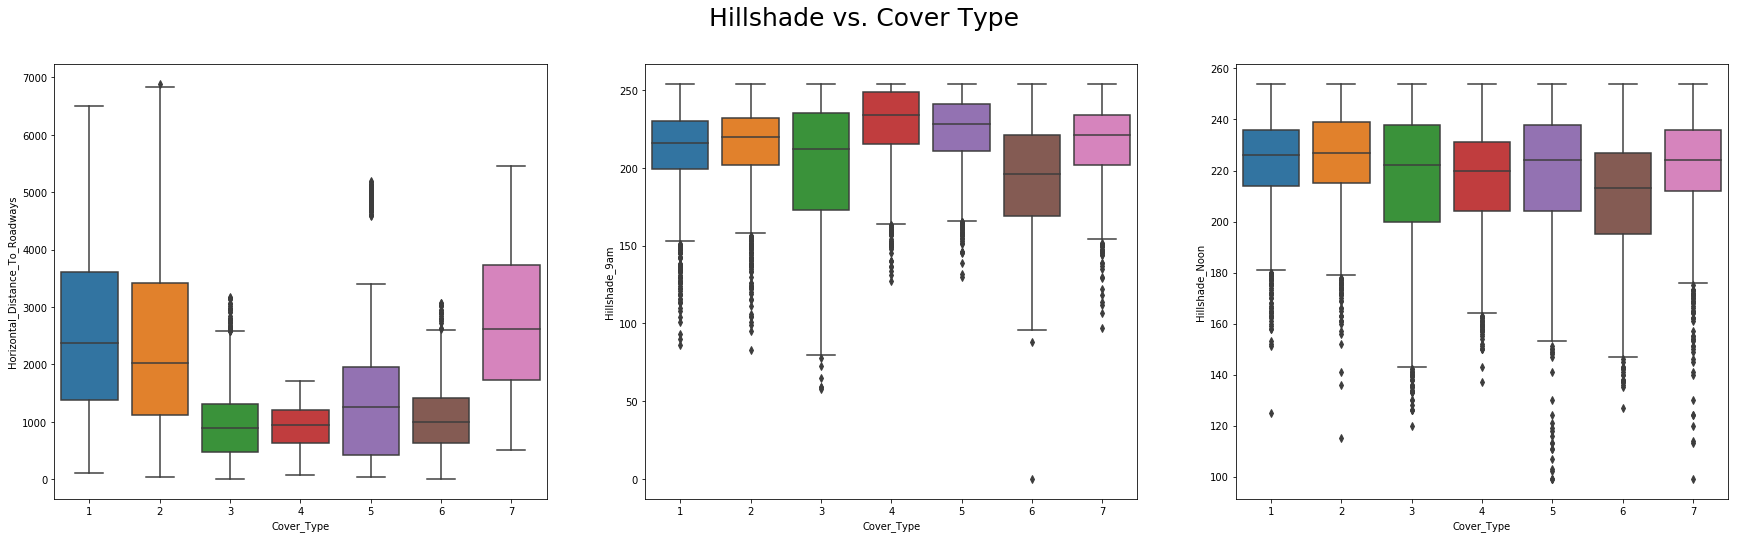

In [12]:
fig = plt.figure(figsize=(30,8))
for i, col in enumerate(train_hillshade.columns[:-1]):  
    ax = fig.add_subplot(int("13"+str(i+1)))
    sns.boxplot(x='Cover_Type', y=col, data=train)
fig.suptitle('Hillshade vs. Cover Type', fontsize =25)
plt.show()

Text(0.5,0.98,'Wilderness Areas vs. Cover Type')

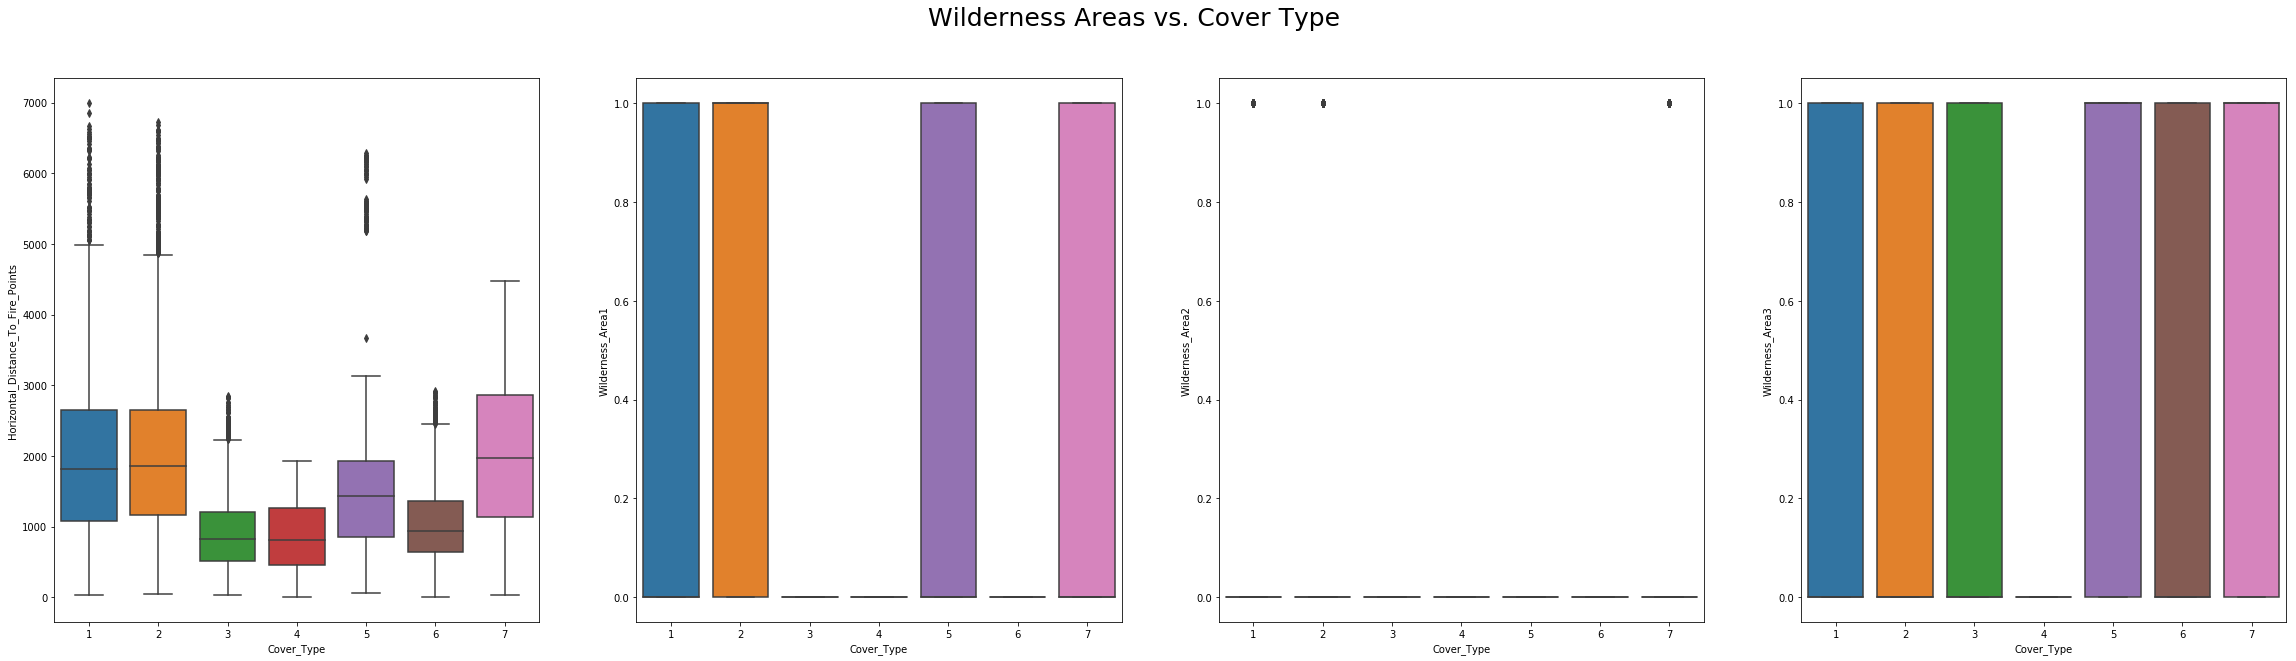

In [13]:
fig = plt.figure(figsize=(40,10))
for i, col in enumerate(train_wilderness.columns[:-1]):  
    ax = fig.add_subplot(fig.add_subplot(int("14"+str(i+1))))
    sns.boxplot(x='Cover_Type', y=col, data=train)
    
fig.suptitle('Wilderness Areas vs. Cover Type', fontsize =25)

As the Wilderness Areas are already 'dummy coded', boxplots are not such helpful visualizations.
Below, we look at value counts to get a better understanding of the cover type per wilderness area.
We'll also do the same for the soil types. 

In [127]:
w1 = train[train["Wilderness_Area1"]==1]
w1["Cover_Type"].value_counts()

2    1134
1    1062
5     856
7     545
Name: Cover_Type, dtype: int64

In [126]:
w2 = train[train["Wilderness_Area2"]==1]
w2["Cover_Type"].value_counts()

7    252
1    181
2     66
Name: Cover_Type, dtype: int64

In [125]:
w3 = train[train["Wilderness_Area3"]==1]
w3["Cover_Type"].value_counts()

7    1363
5    1304
6     962
2     940
1     917
3     863
Name: Cover_Type, dtype: int64

In [128]:
w4 = train[train["Wilderness_Area4"]==1]
w4["Cover_Type"].value_counts()

4    2160
3    1297
6    1198
2      20
Name: Cover_Type, dtype: int64

In [132]:
for i in range(1, 41):
    colname = "Soil_Type" + str(i)
    subset = train[train[colname]==1]
    print(colname)
    print(subset["Cover_Type"].value_counts())

Soil_Type1
4    139
3    121
6     95
Name: Cover_Type, dtype: int64
Soil_Type2
3    283
6    182
4     94
5     61
2      3
Name: Cover_Type, dtype: int64
Soil_Type3
4    799
3    133
6     18
2     12
Name: Cover_Type, dtype: int64
Soil_Type4
3    462
4    133
5    129
6     87
2     20
7      7
1      5
Name: Cover_Type, dtype: int64
Soil_Type5
6    71
3    55
4    39
Name: Cover_Type, dtype: int64
Soil_Type6
3    248
4    244
6    151
2      7
Name: Cover_Type, dtype: int64
Soil_Type7
Series([], Name: Cover_Type, dtype: int64)
Soil_Type8
2    1
Name: Cover_Type, dtype: int64
Soil_Type9
2    9
1    1
Name: Cover_Type, dtype: int64
Soil_Type10
6    1101
3     717
4     170
2      81
5      64
1       9
Name: Cover_Type, dtype: int64
Soil_Type11
5    154
3     89
6     67
2     67
4     24
1      5
Name: Cover_Type, dtype: int64
Soil_Type12
2    203
1     24
Name: Cover_Type, dtype: int64
Soil_Type13
5    305
2     84
6     66
1     17
3      4
Name: Cover_Type, dtype: int64
Soil_Type

Findings:
* Clear correlation between elevation and cover types
* Clear correlation between the different wilderness areas and the cover types
* Clear correlation between the various soil types and the cover types

## Engineering New Features

At the moment, I don't see any feature engineering necessary. It might be relevant in the future to group soil types together to avoid overfitting, but for now, let's move on without.

## Testing different simple models
We'll first split our dataset into train and test.

We'll then check the accuracy of different models, with any tuning or complexity. 
We'll use both the train/test to check accuracy, and the cross validation method, which allows for more reliable error measurements. 

In [17]:
# Let's start with splitting our data into train/test
from sklearn.model_selection import train_test_split

all_X = train.drop("Cover_Type",axis=1)
all_y = train["Cover_Type"]

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=.2, random_state=0)

### Logistic regression

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_X, train_y)

predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.6577380952380952


In [45]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = np.mean(scores)
print(scores)
print(accuracy)

[0.43650794 0.70701058 0.63690476 0.59457672 0.60978836 0.64417989
 0.63624339 0.61640212 0.62367725 0.61441799]
0.6119708994708994


In [48]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=25)
accuracy = np.mean(scores)
print(accuracy)

0.632358803986711


### Decision Tree
Weirdly, we get great accuracy in the train/test split, and terrible using cross val with cv=10. Accuracy increases as we increase the number of folds. Have to look more into it.

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_X, train_y)

predictions = dt.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.7824074074074074


In [42]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, all_X, all_y, cv=10)
accuracy = np.mean(scores)
print(scores)
print(accuracy)

[0.36177249 0.5218254  0.48082011 0.51653439 0.67261905 0.61640212
 0.58994709 0.59986772 0.60449735 0.43981481]
0.540410052910053


In [44]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, all_X, all_y, cv=100)
accuracy = np.mean(scores)
print(accuracy)

0.7220346320346321


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_X, train_y)

predictions = rf.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

In [ ]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, all_X, all_y, cv=10)
accuracy = np.mean(scores)
print(scores)
print(accuracy)

### Determining the Most Relevant Features
Using LR, I should check whether another estimator might work better first.

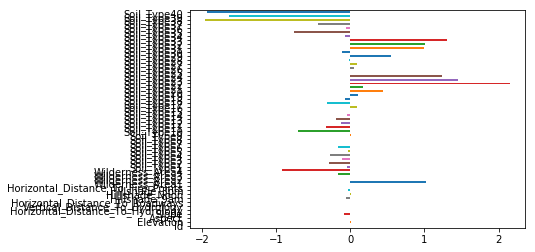

In [32]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Fit model
lr = LogisticRegression()
lr.fit(all_X, all_y)
# Create coeff series with feature column names as index
coefficients = lr.coef_
feature_importance = pd.Series(coefficients[0], index = all_X.columns)
# Plot
feature_importance.plot.barh()
plt.show()

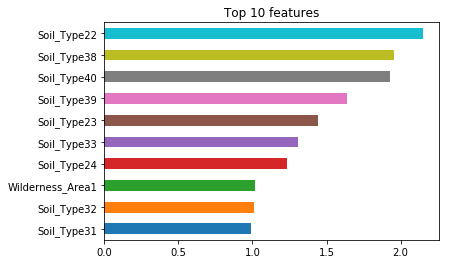

In [28]:
# The above plot is hard to read due to the number of features. Let's break it down
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance[-10:].plot.barh()
plt.title("Top 10 features")
plt.show()

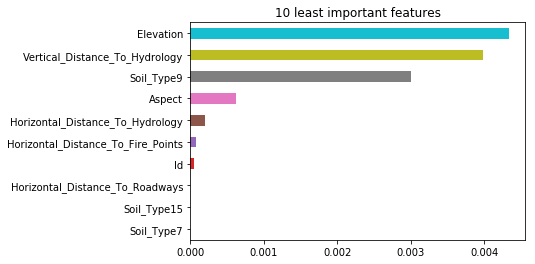

In [31]:
ordered_feature_importance[:10].plot.barh()
plt.title("10 least important features")
plt.show()

## Selecting the Best-Performing Features

Let's use scikit-learn's feature_selection.RFECV class to automate selecting the best-performing features using recursive feature elimination.

To speed up our  workflow, we'll create a function that performs this step for us.

We'll need an estimator as the first parameter when we instantiate a RFECV() object. *At the time we used a Logistic Regression estimator, but we've since discovered in the Model Selection and Tuning mission that Random Forests seems to be a better algorithm for this Kaggle competition.

In [14]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

def select_features(df):
    all_X = df.drop(["Cover_Type", "Id"], axis=1)
    all_y = df["Cover_Type"]
    
    clf = RandomForestClassifier(random_state=1)
    selector = RFECV(clf, cv=10)
    selector.fit(all_X, all_y)
    
    best_columns = list(all_X.columns[selector.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    return best_columns
    
best_columns = select_features(train)

Best Columns 
------------
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type6', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type17', 'Soil_Type20', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type35', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']



## Selecting and Tuning Different Algorithms

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def select_model(df, feature_list):
    all_X = df[feature_list]
    all_y = df["Cover_Type"]
    # list of dictionaries, each containing a model name, 
    #its estimator and a dictionary of hyperparameters:
    models = [
        {
           "name":  "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters": {
                "solver": ["newton-cg", "lbfgs", "liblinear"]
            }
        },
        {
            "name":  "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters": { 
                "n_neighbors": range(1,20,2),
                "weights": ["distance", "uniform"],
                "algorithm": ["ball_tree", "kd_tree", "brute"],
                "p": [1,2]
            }
        },
        {
            "name":  "RandomForestClassifier",
            "estimator": RandomForestClassifier(),
            "hyperparameters": { 
                "n_estimators": [4,6,9],
                "criterion": ["entropy", "gini"],
                "max_depth": [2,5,10],
                "max_features": ["log2", "sqrt"],
                "min_samples_leaf": [1,5,8],
                "min_samples_split": [2,3,5]
            }
        }
    ]
    for model in models:
        print(model["name"])
        print('-'*len(model["name"]))
        grid = GridSearchCV(model["estimator"], 
                            param_grid=model["hyperparameters"], 
                            cv=10)
        grid.fit(all_X, all_y)
        
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_
        
        print("Best params: %s" % model["best_params"])
        print("Best score: %s" % model["best_score"])
        
    return models

best_model = select_model(train, best_columns)

LogisticRegression
------------------


/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', Line

Best params: {'solver': 'newton-cg'}
Best score: 0.6280423280423281
KNeighborsClassifier
--------------------


KeyboardInterrupt: 

In [116]:
# a simple model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

features = ["Elevation", "Slope", "Aspect"]
knn = KNeighborsClassifier()
knn.fit(train[features], train["Cover_Type"])
train["predictions"] = knn.predict(train[features])

mse = mean_squared_error(train["Cover_Type"],train["predictions"])
rmse = mse**(1/2)
rmse

1.5916240748892923

In [117]:
train["predictions"].value_counts()

5    2341
4    2334
3    2221
7    2206
1    2203
2    1922
6    1893
Name: predictions, dtype: int64

* The 7 cover types are equally distributed in our data set. As a result, we won't need to correct inbalance. 
* A clear relationship appears between elevation and cover type. 

To do:
- Cover type as ordered numbers (7>6) while they actually represent categories. We'll need to do something about it
> When we convert a column to the categorical data type, pandas assigns a number from 0 to n-1 (where n is the number of unique values in a column) for each value. The drawback with this approach is that one of the assumptions of linear regression is violated here. Linear regression operates under the assumption that the features are linearly correlated with the target column. For a categorical feature, however, there's no actual numerical meaning to the categorical codes that pandas assigned for that column. An increase in the Utilities column from 1 to 2 has no correlation value with the target column, and the categorical codes are instead used for uniqueness and exclusivity (the category associated with 0 is different than the one associated with 1).
> The common solution is to use a technique called dummy coding. Instead of having a single column with n integer codes, we have n binary columns. 
*dummy_cols = pd.get_dummies()
dummy_cols = pd.DataFrame()
for col in text_cols:
     (Transform col)
    col_dummies = pd.get_dummies(train[col])
   (Add dummy columns to train df, delete the original text col from train df)
    train = pd.concat([train, col_dummies], axis=1)
    del train[col]*

- In case there's an order in the data, we'll need to mix it up to ensure we don't give our algorithm more clues than it should have (random_order = np.random.permutation(len(df)) // df = df.loc[random_order]).

Next steps
## Engineering New Features
## Selecting the Best-Performing Features
## Selecting and Tuning Different Algorithms
## Conclusion


In [ ]:
def save_submission_file(model, cols, filename="submission.csv"):
    holdout_predictions = model.predict(holdout[cols])
    holdout_ids = holdout["Id"]
    
    submission_df = {"Id": holdout_ids,
                    "Cover_Type": holdout_predictions}
    submission = pd.DataFrame(submission_df)
    submission.to_csv(filename, index=False)
    

#best_rf_model = best_model[2]["best_model"]
#save_submission_file(best_rf_model,best_columns)